<a href="https://colab.research.google.com/github/Ofir-Manor/Long2/blob/master/311288203_316084623.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import matplotlib, subplots
import pylab
from sklearn.model_selection import train_test_split
params = {'xtick.labelsize': 18, 'ytick.labelsize': 18, 'axes.titlesize' : 22, 'axes.labelsize' : 20, 'legend.fontsize': 18, 'legend.title_fontsize': 22, 'figure.titlesize': 24 }
pylab.rcParams.update(params)

In [ ]:
train_csv= pd.read_csv("train_data_prepare.csv")
test_csv = pd.read_csv("test_data_prepare.csv")
train = pd.DataFrame(data=train_csv)
test = pd.DataFrame(data=test_csv)

Part 1: Basic model selection with k-Nearest Neighbors

Q1

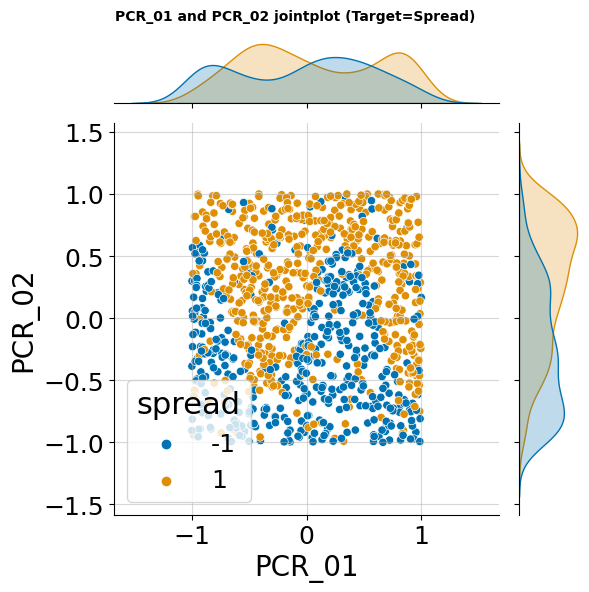

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from visualize_clf import visualize_clf
train_mod = train.copy()[["PCR_01", "PCR_02", "spread"]]
test_mod = test.copy()[["PCR_01", "PCR_02", "spread"]]
g = sns.jointplot(x="PCR_01",
                  y="PCR_02",
                  data=train_mod,
                  hue='spread',
                  palette='colorblind')
g.fig.suptitle("PCR_01 and PCR_02 jointplot (Target=Spread)",
               fontsize='medium', fontweight='semibold')
g.fig.tight_layout()
g.ax_joint.grid(alpha=0.5)

Q2

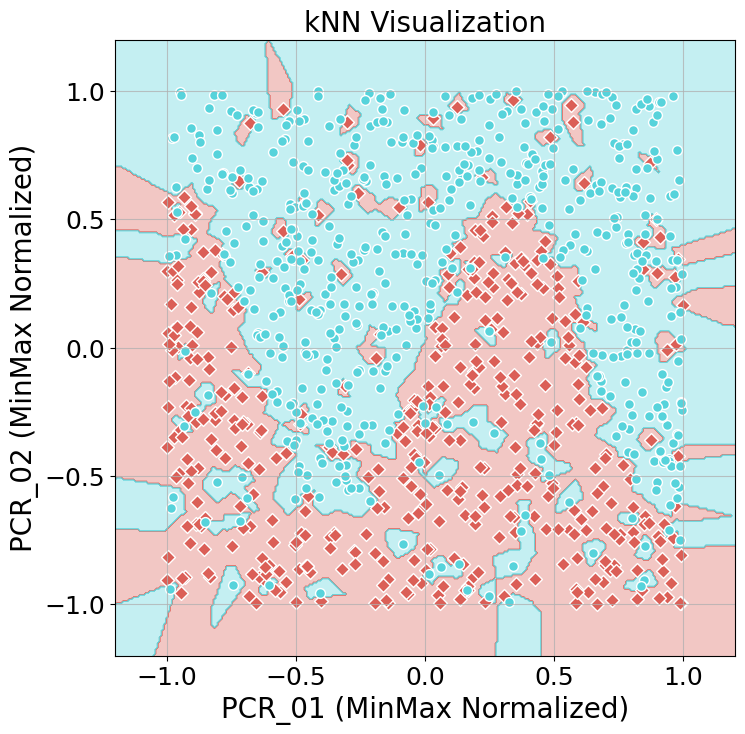

In [ ]:
train_mod_x = train_mod[["PCR_01", "PCR_02"]]
train_mod_y = train_mod["spread"]
kNN = KNeighborsClassifier(n_neighbors=1)
kNN.fit(X=train_mod_x.values, y=train_mod_y.values)
visualize_clf(clf=kNN, X=train_mod_x, Y=train_mod_y, title="kNN Visualization", xlabel="PCR_01 (MinMax Normalized)", ylabel="PCR_02 (MinMax Normalized)")

Q3

In [ ]:
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
k_list = list(range(1, 20, 2)) + list(range(20, 871, 85))
cv_train_mean = np.array([])
cv_val_mean = np.array([])
len(k_list)
for k in k_list:
    kNN_cv = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(estimator = kNN_cv, X=train_mod_x, y=train_mod_y, cv=8, return_train_score=True)
    cv_train_mean = np.append(cv_train_mean, np.array(cv_results['train_score']).mean())
    cv_val_mean = np.append(cv_val_mean, np.array(cv_results['test_score']).mean())


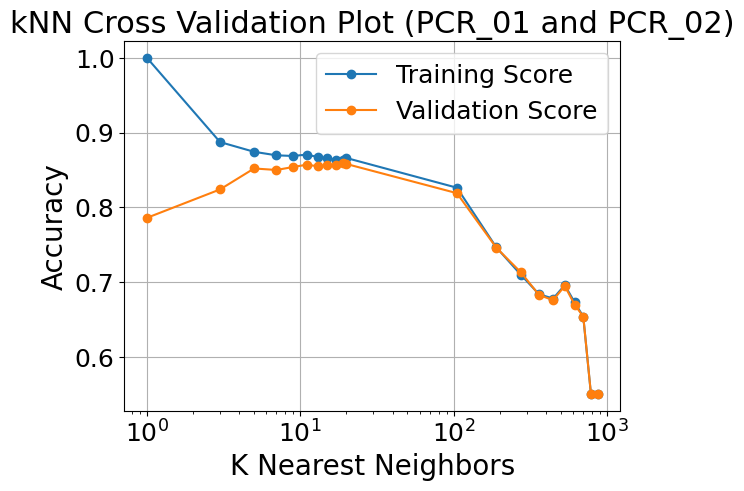

In [ ]:
train_line = plt.semilogx(k_list,cv_train_mean, label="Training Score", marker='o')
val_line = plt.semilogx(k_list,cv_val_mean, label="Validation Score", marker='o')
plt.grid(visible=True)
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Accuracy")
plt.title("kNN Cross Validation Plot (PCR_01 and PCR_02)")
plt.legend()
plt.show()

In [ ]:
k_opt_idx = 9
k_opt = k_list[k_opt_idx]
print(f"The best k found in out cross validation is: {k_opt}")
print(f"The training accuracy with k={k_opt} is {cv_train_mean[k_opt_idx]}")
print(f"The validation accuracy with k={k_opt} is {cv_val_mean[k_opt_idx]}")

The best k found in out cross validation is: 19
The training accuracy with k=19 is 0.863
The validation accuracy with k=19 is 0.859


Q4

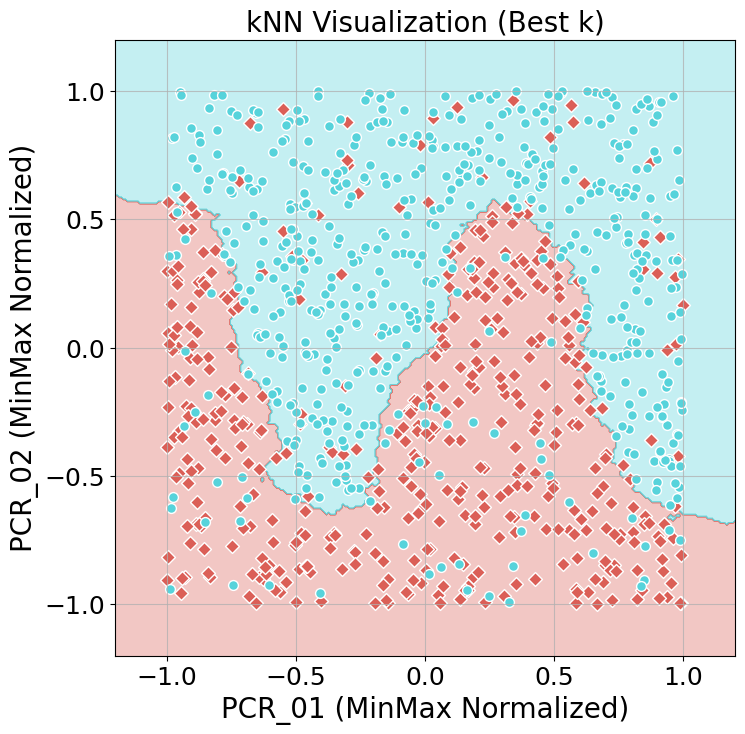

In [ ]:
kNN_opt = KNeighborsClassifier(n_neighbors=k_opt)
kNN_opt.fit(X=train_mod_x.values, y=train_mod_y.values)
visualize_clf(clf=kNN_opt, X=train_mod_x, Y=train_mod_y, title="kNN Visualization (Best k)", xlabel="PCR_01 (MinMax Normalized)", ylabel="PCR_02 (MinMax Normalized)")

In [ ]:
print("What is meant by seperate test split")

What is meant by seperate test split


Q5

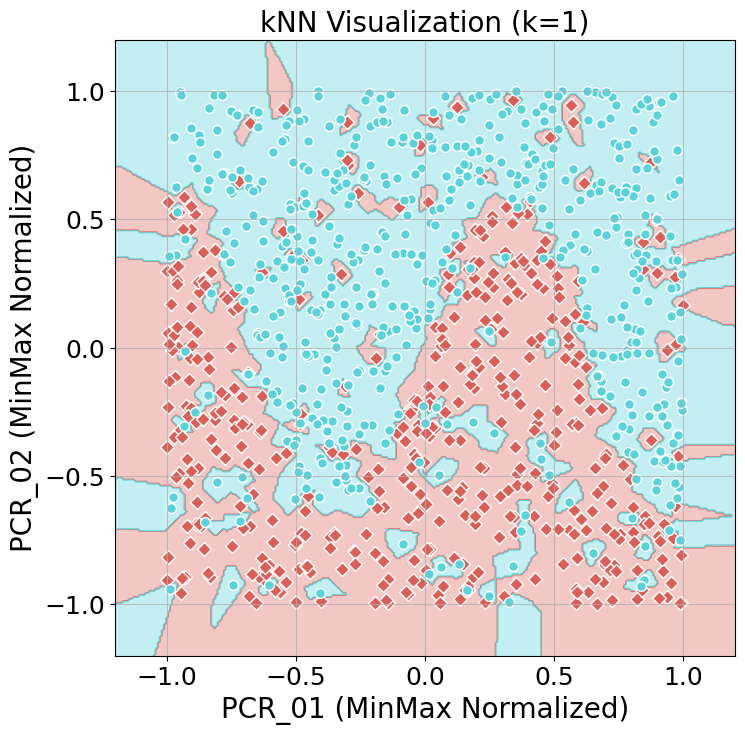

In [ ]:
kNN1 =  KNeighborsClassifier(n_neighbors=1)
kNN1.fit(X=train_mod_x.values, y=train_mod_y.values)
visualize_clf(clf=kNN1, X=train_mod_x, Y=train_mod_y, title="kNN Visualization (k=1)", xlabel="PCR_01 (MinMax Normalized)", ylabel="PCR_02 (MinMax Normalized)")

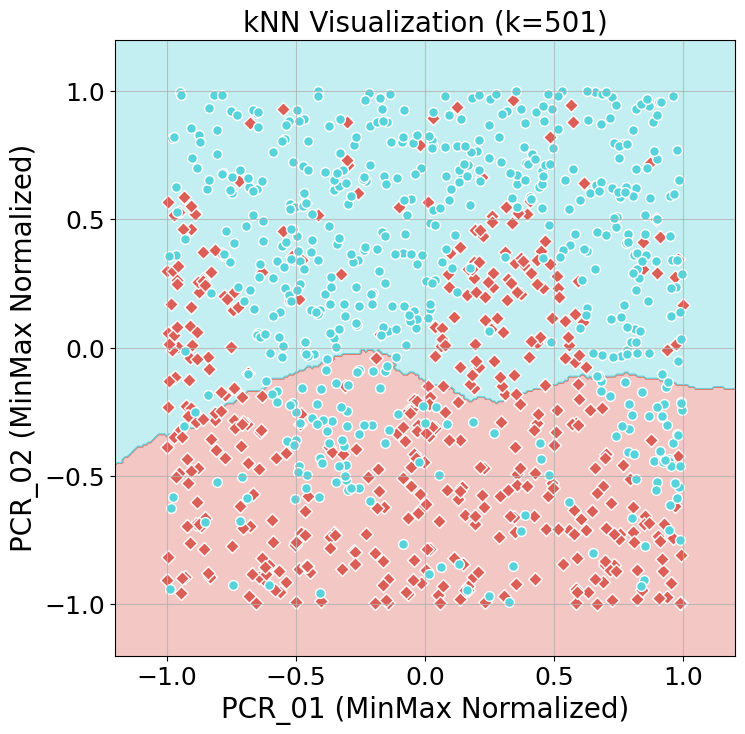

In [ ]:
kNN501 =  KNeighborsClassifier(n_neighbors=501)
kNN501.fit(X=train_mod_x.values, y=train_mod_y.values)
visualize_clf(clf=kNN501, X=train_mod_x, Y=train_mod_y, title="kNN Visualization (k=501)", xlabel="PCR_01 (MinMax Normalized)", ylabel="PCR_02 (MinMax Normalized)")

Q6

In [ ]:
train_x = train[train.columns.difference(['spread', 'risk'])]
train_y = train["spread"]
cv_train_mean = np.array([])
cv_val_mean = np.array([])
for k in k_list:
    kNN_cv = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(estimator = kNN_cv, X=train_x, y=train_y, cv=8, return_train_score=True)
    cv_train_mean = np.append(cv_train_mean, np.array(cv_results['train_score']).mean())
    cv_val_mean = np.append(cv_val_mean, np.array(cv_results['test_score']).mean())

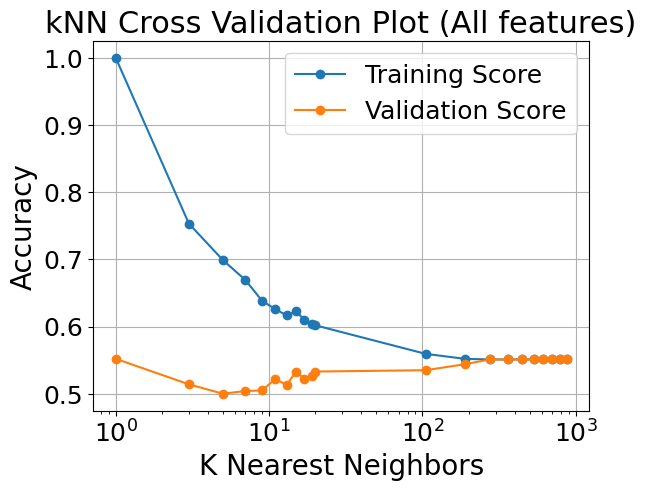

In [ ]:
train_line = plt.semilogx(k_list,cv_train_mean, label="Training Score", marker='o')
val_line = plt.semilogx(k_list,cv_val_mean, label="Validation Score", marker='o')
plt.grid(visible=True)
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Accuracy")
plt.title("kNN Cross Validation Plot (All features)")
plt.legend()
plt.show()

In [ ]:
k_opt_idx = 13
k_opt = k_list[k_opt_idx]
print(f"The best k found in out cross validation is: {k_opt}")
print(f"The training accuracy with k={k_opt} is {cv_train_mean[k_opt_idx]}")
print(f"The validation accuracy with k={k_opt} is {cv_val_mean[k_opt_idx]}")

The best k found in out cross validation is: 275
The training accuracy with k=275 is 0.5509999999999999
The validation accuracy with k=275 is 0.551


Part 2: Decision trees

Q7

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
train_x = train[train.columns.difference(['spread', 'risk'])]
train_y = train['risk']
dec_tree.fit(X=train_x, y=train_y)
train_score = dec_tree.score(X=train_x, y=train_y)
print(f"The training accuracy is {train_score}")

The training accuracy is 0.796


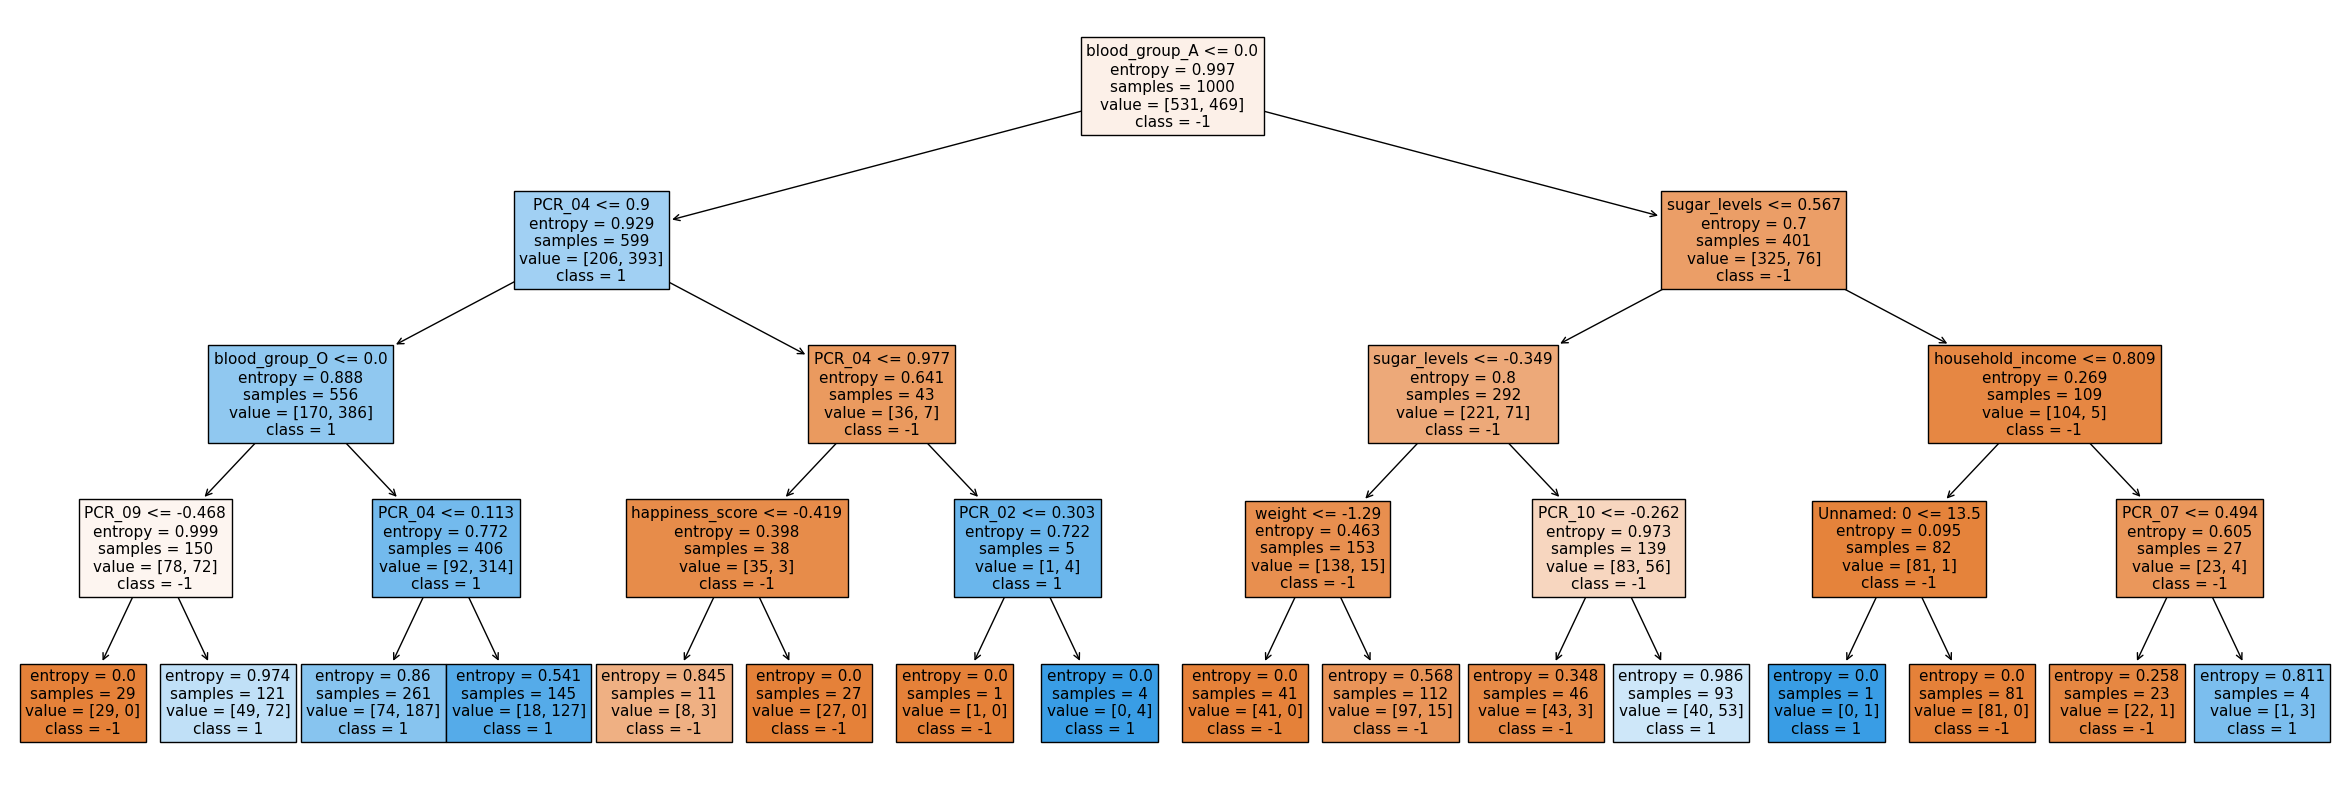

In [ ]:
plt.figure(figsize=(30,10))
plot_tree(decision_tree=dec_tree,
          filled=True,
          feature_names=train.columns.difference(['spread', 'risk']),
          class_names=["-1", "1"],
        fontsize=11)
plt.show()

Q8 Need some help with this

In [ ]:
from sklearn.model_selection import GridSearchCV
min_samples_list = list(range(10,25,1))
max_depth_list = list(range(5,13,1))
parameters = {'max_depth':max_depth_list, 'min_samples_split':min_samples_list}
dec_tree = DecisionTreeClassifier(criterion="entropy")
grid_search = GridSearchCV(estimator=dec_tree, param_grid=parameters,cv=8,return_train_score=True)
grid_search.fit(X=train_x, y=train_y)

GridSearchCV(cv=8, error_score='raise',
             estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_split': [10, 11, 12, 13, 14, 15, 16, 17,
                                               18, 19, 20, 21, 22, 23, 24]},
             return_train_score=True)

In [ ]:
mean_train_score = grid_search.cv_results_["mean_train_score"].reshape(len(max_depth_list),len(min_samples_list))
mean_test_score = grid_search.cv_results_["mean_test_score"].reshape(len(max_depth_list),len(min_samples_list))

Text(0.5, 1.0, 'Mean Validation Accuracy')

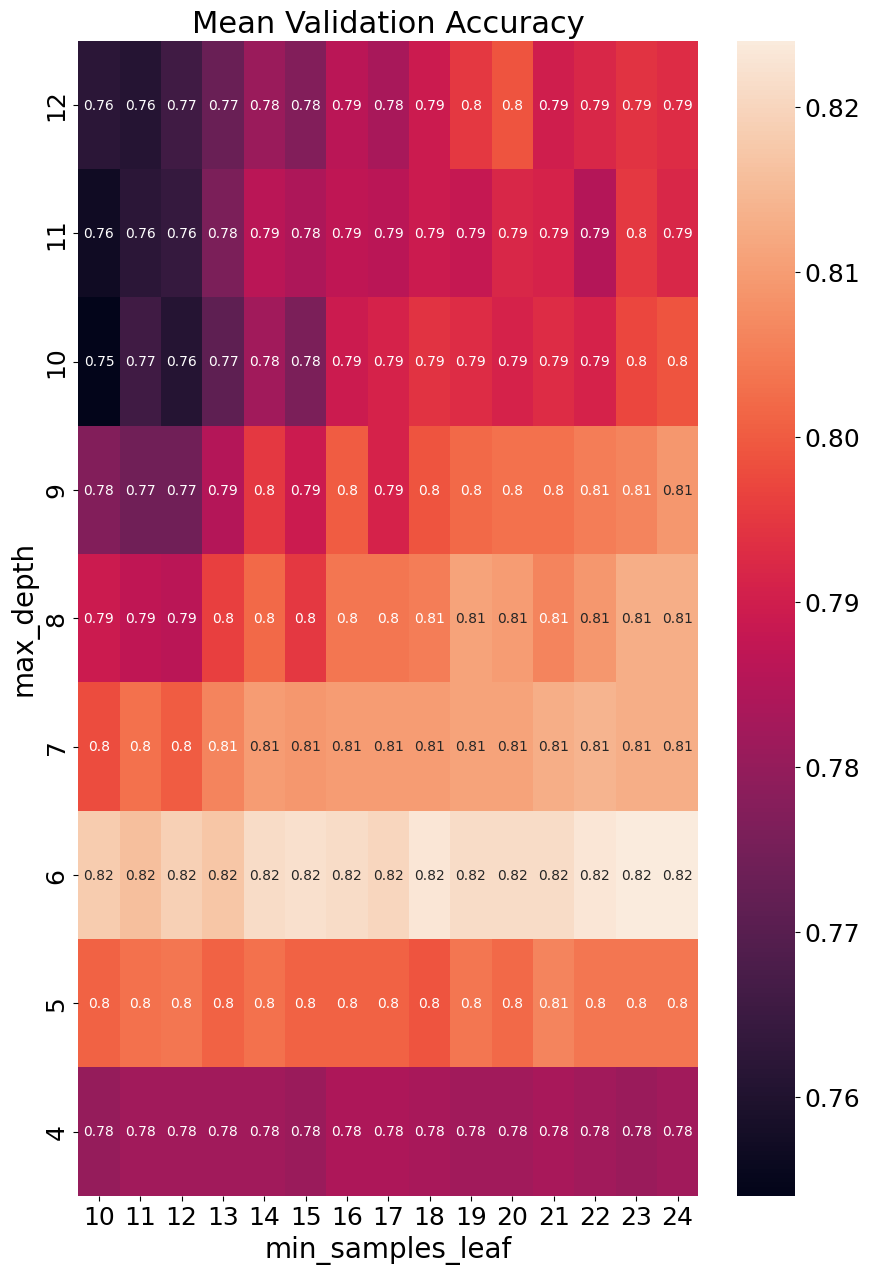

In [ ]:
plt.figure(figsize=(10,15))
ax_test = sns.heatmap(mean_test_score, annot=True, xticklabels=min_samples_list, yticklabels=max_depth_list)
ax_test.set(xlabel="min_samples_leaf", ylabel="max_depth")
ax_test.invert_yaxis()
ax_test.set_title("Mean Validation Accuracy")

Text(0.5, 1.0, 'Mean Training Accuracy')

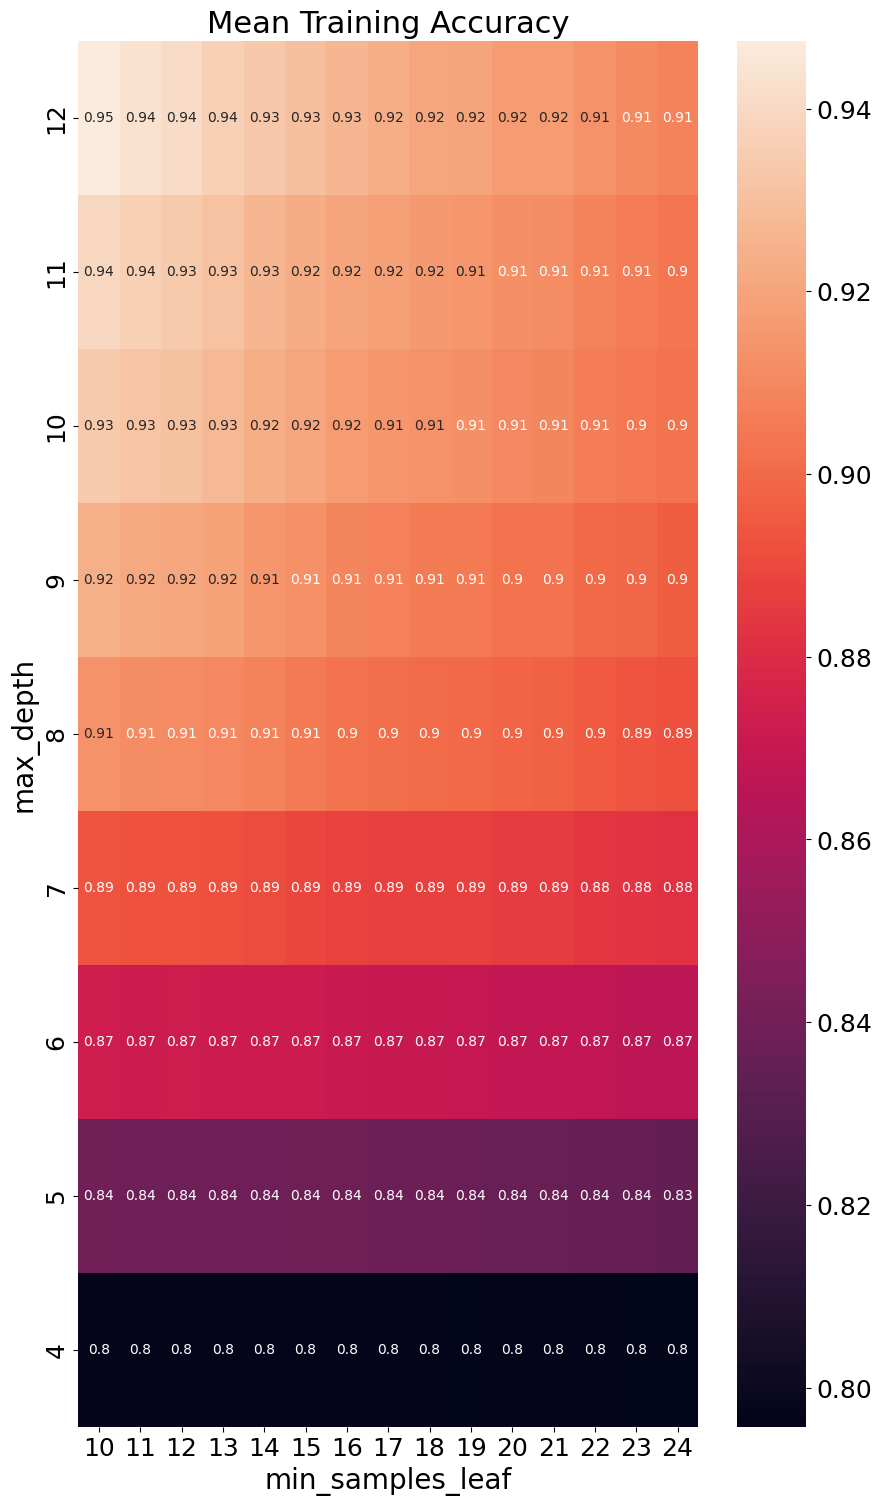

In [ ]:
plt.figure(figsize=(10,18))
ax_train = sns.heatmap(mean_train_score, annot=True, xticklabels=min_samples_list, yticklabels=max_depth_list)
ax_train.set(xlabel="min_samples_leaf", ylabel="max_depth")
ax_train.invert_yaxis()
ax_train.set_title("Mean Training Accuracy")